# Week 8 Assignment - High Frequency Words

**By Eddie Xu and Mohamed Hassan-El Serafi**

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Corpus

For this assignment, we used a speech from then-Presidential candidate Joe Biden, given during the Democratic National Convention in 2020. The dataset was retrieved from Kaggle, which you can find here: https://www.kaggle.com/datasets/christianlillelund/joe-biden-2020-dnc-speech

In [1]:
# import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.book import *
from matplotlib import style
import string
from random import sample
import nltk
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
df = pd.read_csv("joe_biden_dnc_2020_speech.csv")

In [3]:
df.head()

TEXT
0  The civil rights movement left us with this wi...
1  But while I'll be a democratic candidate, I wi...
2  This campaign isn't just about winning votes. ...
3  So the question for us is simple. Are we ready...
4  5 million Americans infected by COVID-19. More...

In [4]:
# combine rows and show full text
text = " ".join(xx for xx in df.TEXT)
text

"The civil rights movement left us with this wisdom, give people light and they will find the way. Give people light. Those are words for our time. The current president has cloaked America in darkness for much too long. Too much anger, too much fear, too much division. Here and now I give you my word, if you entrust me with the presidency, I will draw on the best of us, not the worst. I'll be an ally of the light, not the darkness. It's time for us, for we the people to come together. And make no mistake. United we can and will overcome this season of darkness in America. We'll choose hope over fear, facts over fiction, fairness over privilege. I'm a proud Democrat, and I'll be proud to carry the banner of our party into the general election. So it's with great honor and humility, I accept this nomination for president of the United States of America. But while I'll be a democratic candidate, I will be an American president. I'll work hard for those who didn't support me, as hard for 

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [5]:
# lower case
text = text.lower()

In [6]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '.',
            'said', 'and', 'but', 'the', '-', '–', '—', 'let', ',', 'get', '1', '1', 'like', 'lot', "'s","'ll","'re","n't","'ve","'m"]
sw_set = set(sw_list)

In [7]:
# tokenize text
speech_words = nltk.word_tokenize(text)

In [8]:
len(speech_words)

3945

In [9]:
speech_words

['the',
 'civil',
 'rights',
 'movement',
 'left',
 'us',
 'with',
 'this',
 'wisdom',
 ',',
 'give',
 'people',
 'light',
 'and',
 'they',
 'will',
 'find',
 'the',
 'way',
 '.',
 'give',
 'people',
 'light',
 '.',
 'those',
 'are',
 'words',
 'for',
 'our',
 'time',
 '.',
 'the',
 'current',
 'president',
 'has',
 'cloaked',
 'america',
 'in',
 'darkness',
 'for',
 'much',
 'too',
 'long',
 '.',
 'too',
 'much',
 'anger',
 ',',
 'too',
 'much',
 'fear',
 ',',
 'too',
 'much',
 'division',
 '.',
 'here',
 'and',
 'now',
 'i',
 'give',
 'you',
 'my',
 'word',
 ',',
 'if',
 'you',
 'entrust',
 'me',
 'with',
 'the',
 'presidency',
 ',',
 'i',
 'will',
 'draw',
 'on',
 'the',
 'best',
 'of',
 'us',
 ',',
 'not',
 'the',
 'worst',
 '.',
 'i',
 "'ll",
 'be',
 'an',
 'ally',
 'of',
 'the',
 'light',
 ',',
 'not',
 'the',
 'darkness',
 '.',
 'it',
 "'s",
 'time',
 'for',
 'us',
 ',',
 'for',
 'we',
 'the',
 'people',
 'to',
 'come',
 'together',
 '.',
 'and',
 'make',
 'no',
 'mistake',
 '.'

In [10]:
# remove single characters
speech_words = [word for word in speech_words if len(word) > 1]

# remove stopwords
speech_words = [word for word in speech_words if word not in sw_set]

In [11]:
len(speech_words)

1576

In [12]:
speech_words

['civil',
 'rights',
 'movement',
 'left',
 'us',
 'wisdom',
 'give',
 'people',
 'light',
 'find',
 'way',
 'give',
 'people',
 'light',
 'words',
 'time',
 'current',
 'president',
 'cloaked',
 'america',
 'darkness',
 'much',
 'long',
 'much',
 'anger',
 'much',
 'fear',
 'much',
 'division',
 'give',
 'word',
 'entrust',
 'presidency',
 'draw',
 'best',
 'us',
 'worst',
 'ally',
 'light',
 'darkness',
 'time',
 'us',
 'people',
 'come',
 'together',
 'make',
 'mistake',
 'united',
 'overcome',
 'season',
 'darkness',
 'america',
 'choose',
 'hope',
 'fear',
 'facts',
 'fiction',
 'fairness',
 'privilege',
 'proud',
 'democrat',
 'proud',
 'carry',
 'banner',
 'party',
 'general',
 'election',
 'great',
 'honor',
 'humility',
 'accept',
 'nomination',
 'president',
 'united',
 'states',
 'america',
 'democratic',
 'candidate',
 'american',
 'president',
 'work',
 'hard',
 'support',
 'hard',
 'vote',
 'job',
 'president',
 'represent',
 'us',
 'base',
 'party',
 'partisan',
 'moment

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

## 4. Identify the 200 highest frequency words in this corpus.

In [13]:
# count word frequencies
speech_word_freqs = nltk.FreqDist(speech_words)

In [14]:
speech_word_freqs

FreqDist({'america': 30, 'president': 29, 'us': 18, 'one': 18, 'people': 17, 'going': 12, 'never': 12, 'nation': 12, 'light': 11, 'time': 11, ...})

In [15]:
len(speech_word_freqs)

833

In [20]:
most_common_words = speech_word_freqs.most_common(200)
most_common_words

[('america', 30),
 ('president', 29),
 ('us', 18),
 ('one', 18),
 ('people', 17),
 ('going', 12),
 ('never', 12),
 ('nation', 12),
 ('light', 11),
 ('time', 11),
 ('make', 11),
 ('great', 11),
 ('united', 10),
 ('hope', 10),
 ('moment', 10),
 ('much', 8),
 ('together', 8),
 ('american', 8),
 ('love', 8),
 ('history', 8),
 ('say', 8),
 ('world', 8),
 ('way', 7),
 ('hard', 7),
 ('country', 7),
 ('know', 7),
 ('take', 7),
 ('million', 7),
 ('back', 7),
 ('protect', 7),
 ('always', 7),
 ('work', 6),
 ('promise', 6),
 ('believe', 6),
 ('americans', 6),
 ('every', 6),
 ('current', 5),
 ('fear', 5),
 ('new', 5),
 ('could', 5),
 ('winning', 5),
 ('injustice', 5),
 ('opportunity', 5),
 ('ready', 5),
 ('years', 5),
 ('many', 5),
 ('look', 5),
 ('year', 5),
 ('family', 5),
 ('first', 5),
 ('life', 5),
 ('purpose', 5),
 ('pay', 5),
 ('powerful', 5),
 ('left', 4),
 ('give', 4),
 ('words', 4),
 ('darkness', 4),
 ('long', 4),
 ('worst', 4),
 ('states', 4),
 ('job', 4),
 ('virus', 4),
 ('well', 4),
 (

In [18]:
speech_word_freq_df = pd.DataFrame(sorted(speech_word_freqs.items(), key=lambda x: x[1], reverse=True), 
                               columns=['Word', 'Frequency']).head(200)

In [19]:
speech_word_freq_df

Word  Frequency
0      america         30
1    president         29
2           us         18
3          one         18
4       people         17
..         ...        ...
195       away          2
196      obama          2
197     worked          2
198   speaking          2
199       vice          2

[200 rows x 2 columns]

## 5. Create a graph that shows the relative frequency of these 200 words.

In [ ]:
# # plot word frequencies
# plt.rcParams['figure.figsize'] = [12, 6]
# speech_word_freqs.plot(200)

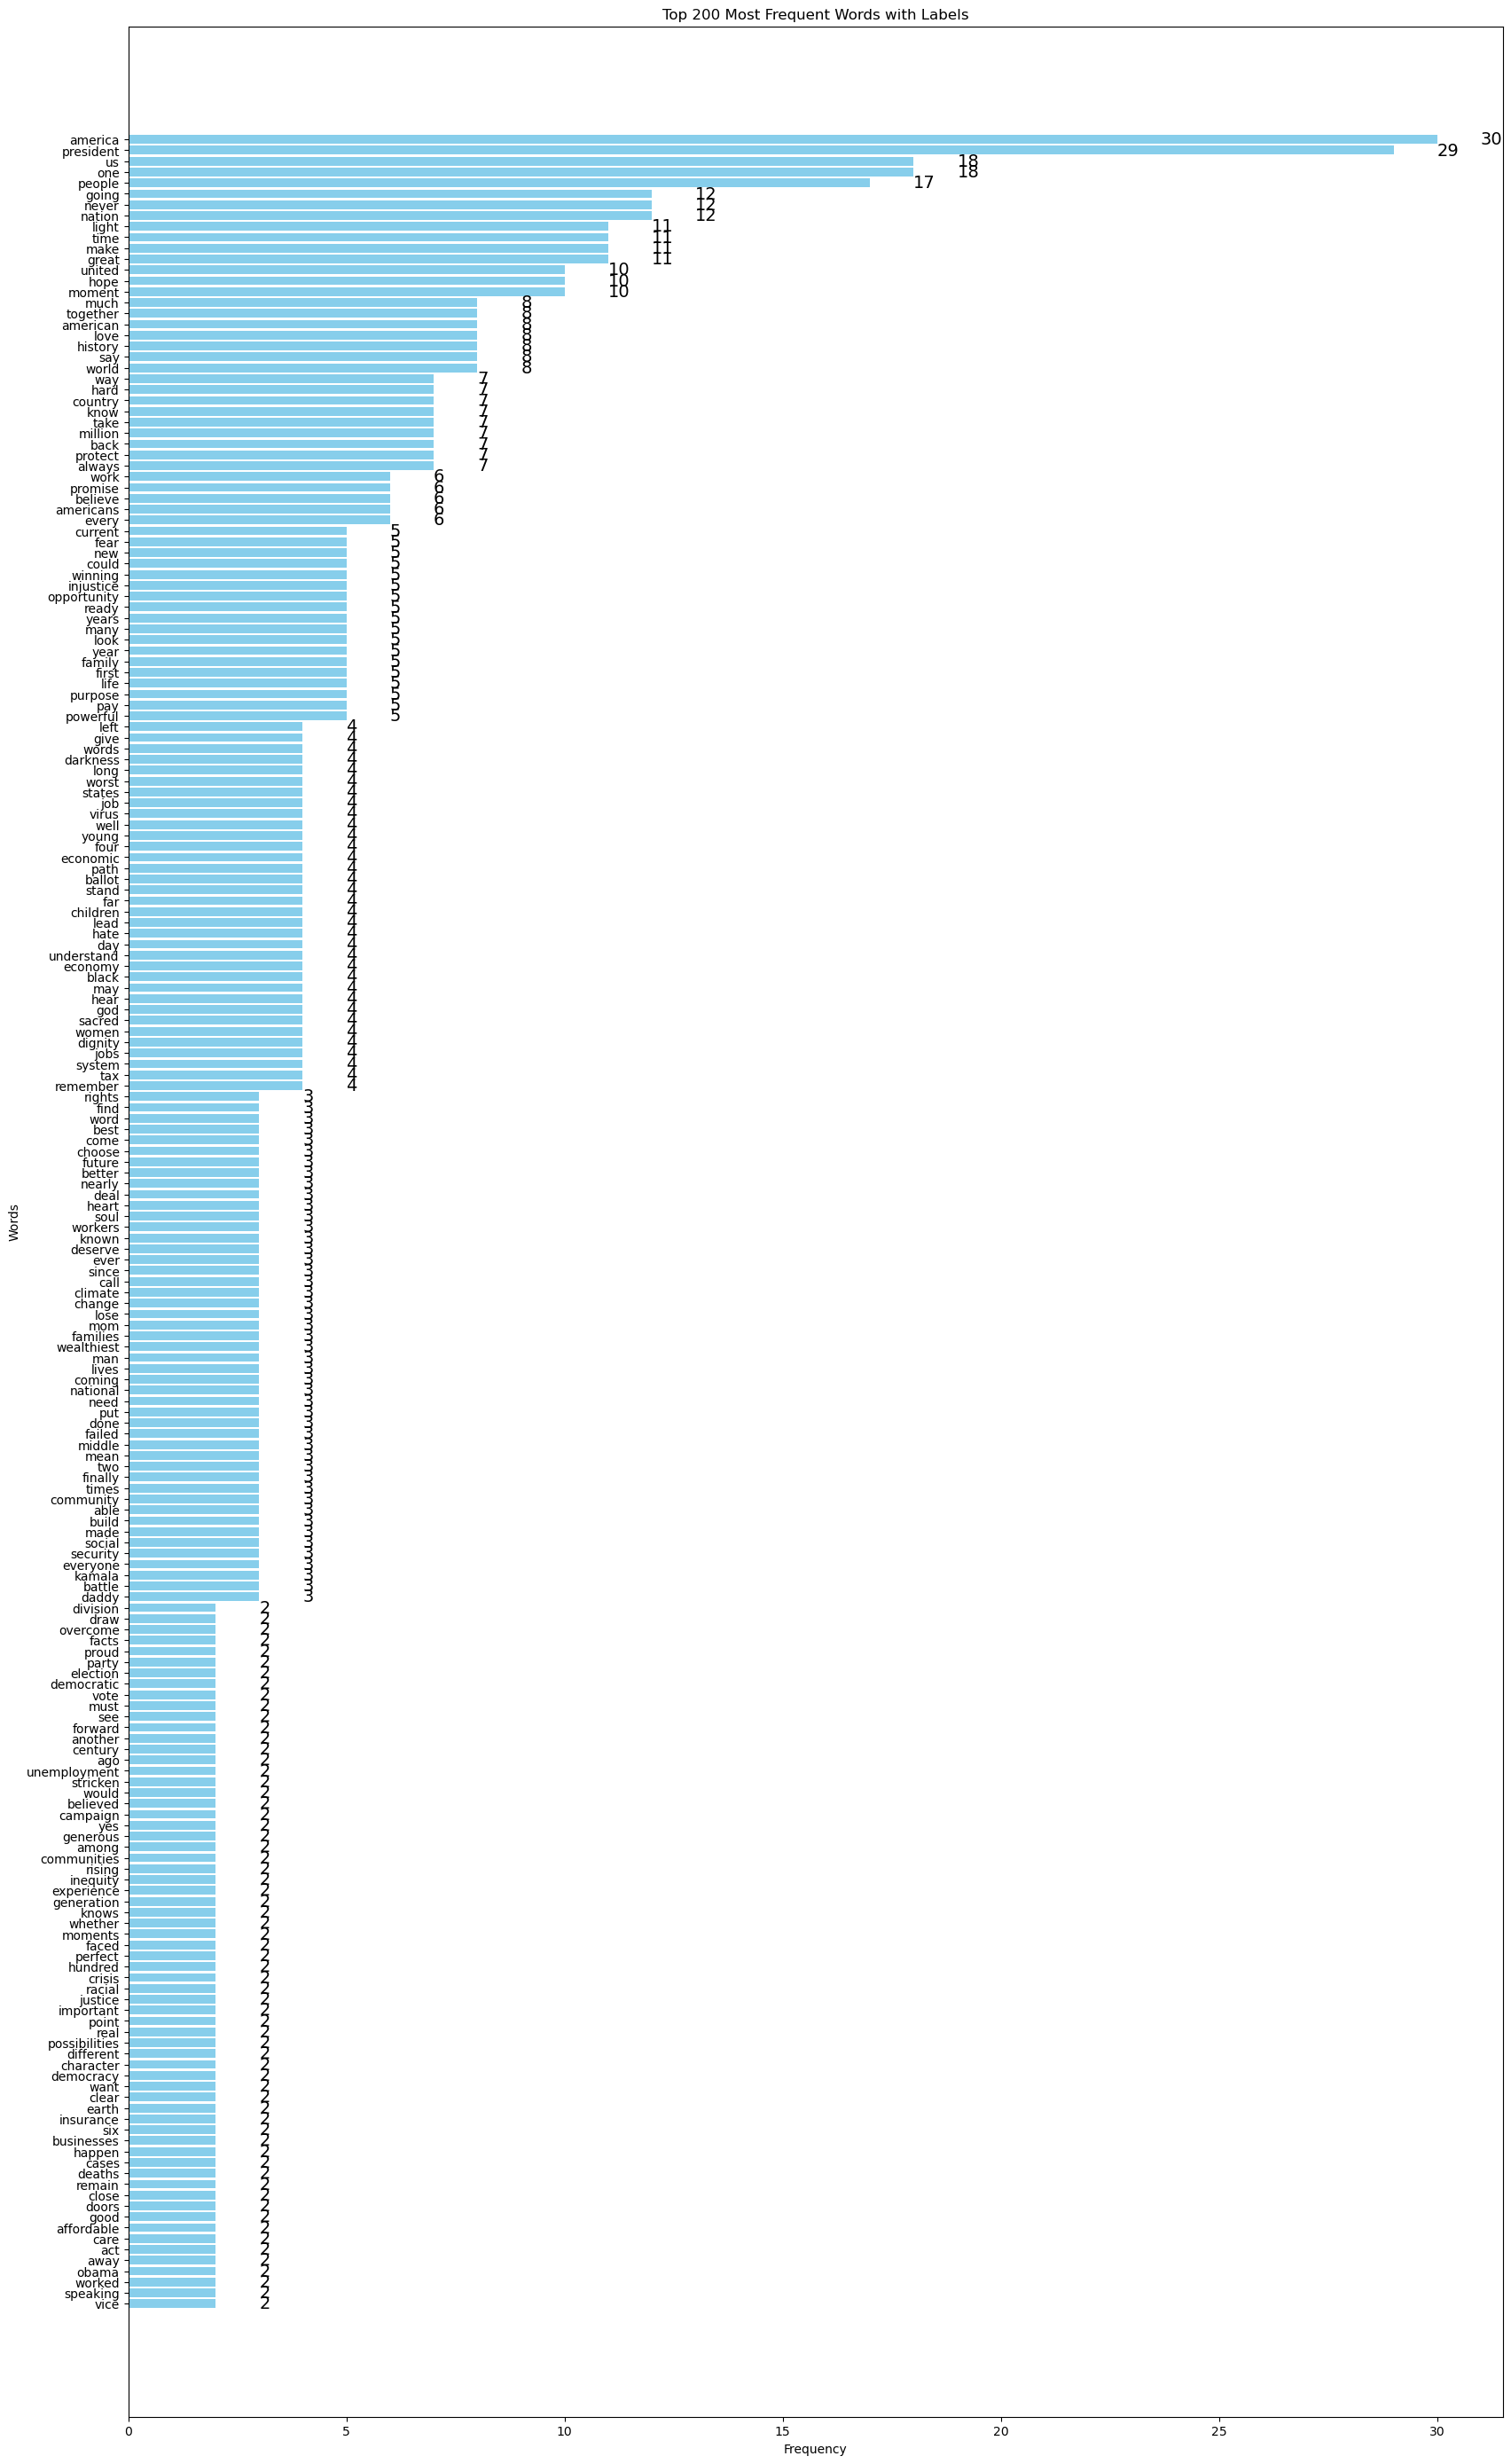

In [42]:
plt.figure(figsize=(20, 35))
bars = plt.barh([word for word, _ in most_common_words], [freq for _, freq in most_common_words], color='skyblue')

# Add data labels
for bar, (word, freq) in zip(bars, most_common_words):
    plt.text(bar.get_width() + 1,  # X-coordinate (right of the bar)
             bar.get_y() + bar.get_height()/2,  # Y-coordinate (center of the bar)
             str(freq),  # Display the frequency
             va='center', ha='left', color='black', fontsize=14)

# Labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 200 Most Frequent Words with Labels')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency on top
plt.show()

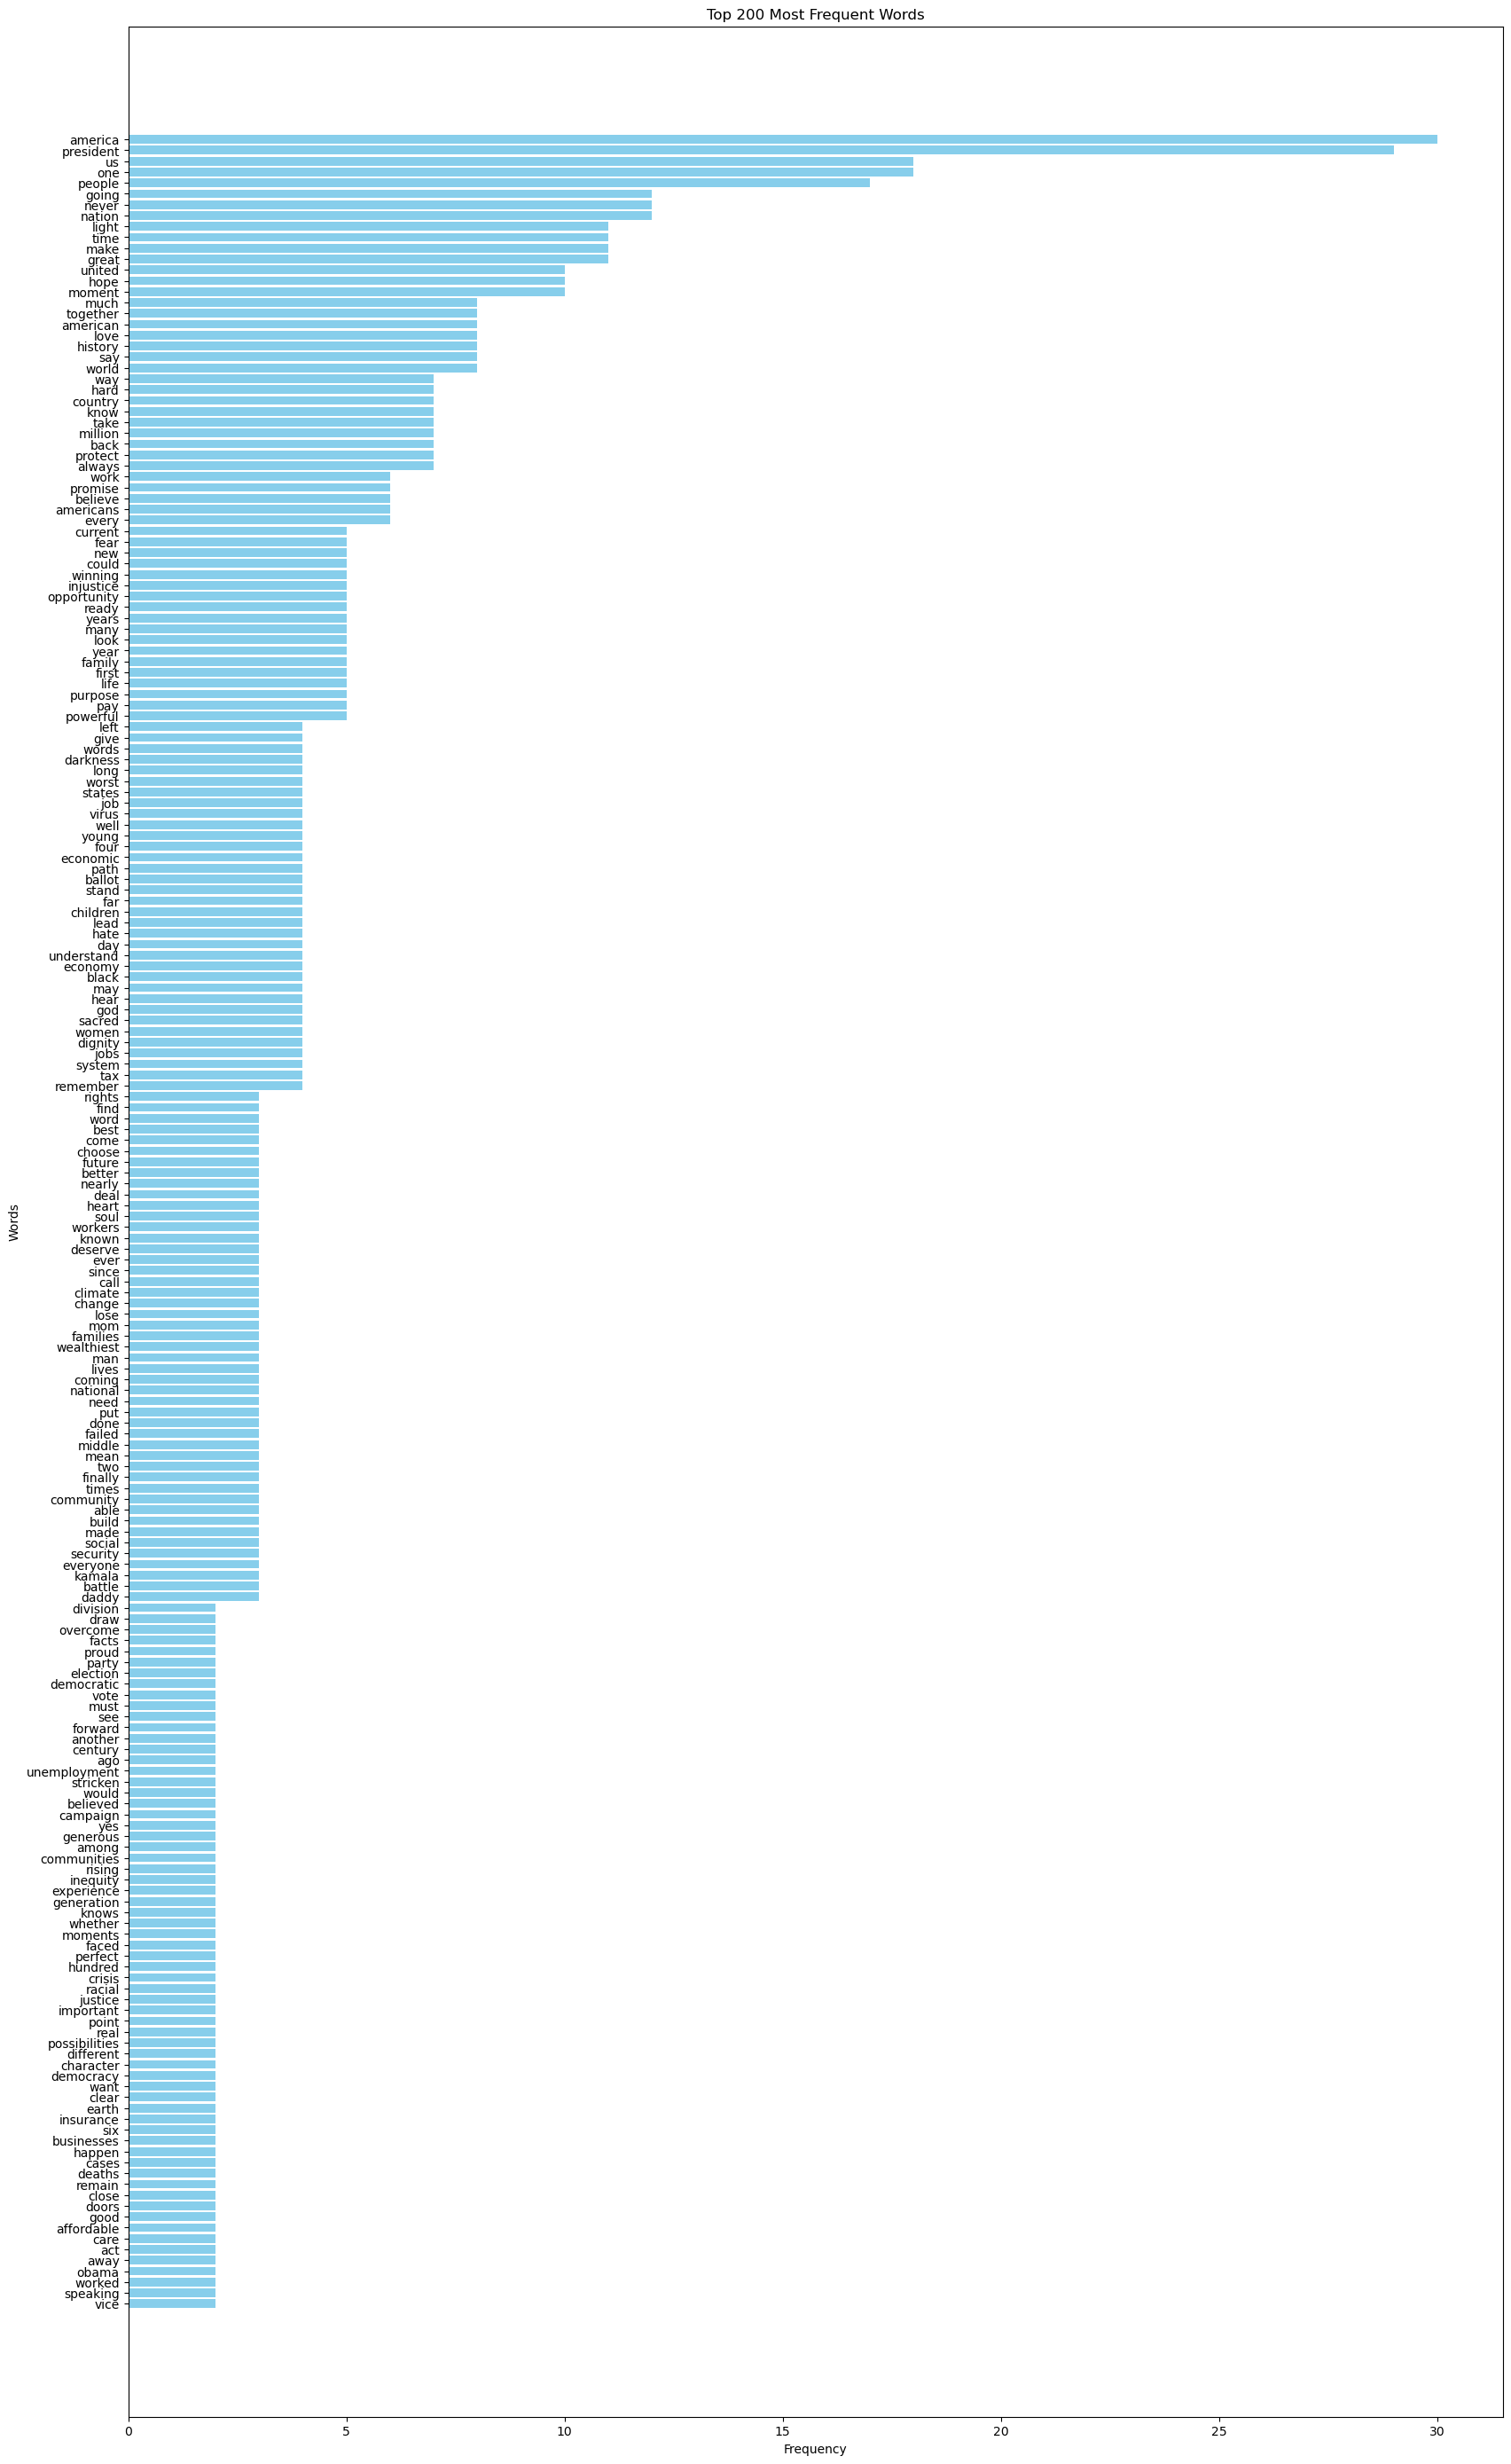

In [38]:
# Plotting the top 200 words
plt.figure(figsize=(20, 35))
plt.barh([word for word, _ in most_common_words], [freq for _, freq in most_common_words], color='skyblue')
#plt.bar(*zip(*most_common_words), color='skyblue')
#plt.xticks(rotation=90)
plt.title('Top 200 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis() 
plt.show()

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”